In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset

dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/imdb_data.csv")

In [ ]:
# Cleaning the Texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []


for i in range(0, 50000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
obj = cv.fit(corpus)
X = cv.transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(min_df=5, max_df=0.25, ngram_range=(1,2))
# tfidf.fit(corpus)
# X = tfidf.transform(corpus)
# y = dataset.iloc[:, -1].values

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = nb_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'negative']
 ...
 ['positive' 'positive']
 ['negative' 'positive']
 ['negative' 'negative']]


In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

In [ ]:
# Evaluating the model
from sklearn.metrics import accuracy_score

accuracy_score_nb = accuracy_score(nb_classifier.predict(X_test), y_test)
print("NB Accuracy: "+str('{:04.2f}'.format(accuracy_score_nb*100))+" %")

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report: \n", classification_report(y_test, nb_classifier.predict(X_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, nb_classifier.predict(X_test)))

NB Accuracy: 71.64 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.67      0.86      0.75      5035
    Positive       0.80      0.57      0.67      4965

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.71     10000
weighted avg       0.73      0.72      0.71     10000

Confusion Matrix: 
 [[4324  711]
 [2125 2840]]


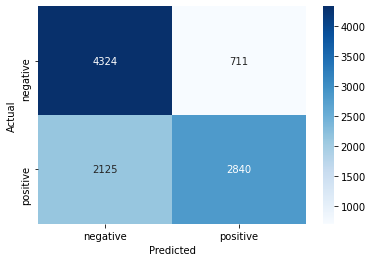

In [ ]:
#Plotting Confusion Matrix
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, nb_classifier.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="Blues", annot=True, fmt='g')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 250)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Evaluating the model
from sklearn.metrics import accuracy_score

accuracy_score_rf = accuracy_score(rf.predict(X_test), y_test)
print("RF Accuracy: "+str('{:04.2f}'.format(accuracy_score_rf*100))+" %")

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report: \n", classification_report(y_test, rf.predict(X_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, rf.predict(X_test)))

RF Accuracy: 85.35 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.85      0.86      0.86      5035
    Positive       0.85      0.85      0.85      4965

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix: 
 [[4320  715]
 [ 750 4215]]


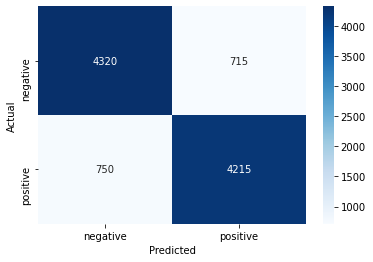

In [ ]:
#Plotting Confusion Matrix
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, rf.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="Blues", annot=True, fmt='g')
plt.show()

In [ ]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC(max_iter = 10000)
LSVC.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
accuracy_score_svc = accuracy_score(LSVC.predict(X_test), y_test)
print("Linear SVC accuracy = " + str('{:04.2f}'.format(accuracy_score_svc*100))+" %")
print("Classification Report: \n", classification_report(y_test, LSVC.predict(X_test),target_names=['Negative','Positive']))

Linear SVC accuracy = 86.08 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.87      0.86      0.86      5035
    Positive       0.86      0.87      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



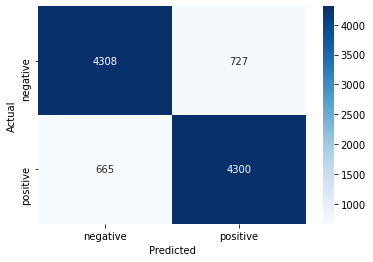

In [ ]:
#Plotting Confusion Matrix
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, LSVC.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="Blues", annot=True, fmt='g')
plt.show()

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# knn.fit(X_train, y_train)

In [ ]:
# accuracy_score_knn = accuracy_score(rf.predict(X_test), y_test)
# print("KNN Accuracy: "+str('{:04.2f}'.format(accuracy_score_knn*100))+" %")

# from sklearn.metrics import classification_report, confusion_matrix

# print("Classification Report: \n", classification_report(y_test, knn.predict(X_test),target_names=['Negative','Positive']))
# print("Confusion Matrix: \n", confusion_matrix(y_test, knn.predict(X_test)))

In [ ]:
# Testing for Custom Input

sample = "“Avengers: Endgame” is the culmination of a decade of blockbuster filmmaking, the result of years of work from thousands of people. It is designed to be the most blockbuster of all the blockbusters, a movie with a dozen subplots colliding, and familiar faces from over 20 other movies. It’s really like nothing that Hollywood has produced before, existing not just to acknowledge or exploit the fans of this series, but to reward their love, patience, and undying adoration. The blunt thing you probably want to know most: It’s hard to see serious MCU fans walking away from this disappointed. It checks all the boxes, even ticking off a few ones that fans won’t expect to be on the list. It’s a satisfying end to a chapter of blockbuster history that will be hard to top for pure spectacle. In terms of sheer entertainment value, it’s on the higher end of the MCU, a film that elevates its most iconic heroes to the legendary status they deserve and provides a few legitimate thrills along the way."
review = re.sub('[^a-zA-Z]', ' ', sample)
review = review.lower()
review = review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
review = ' '.join(review)
print(review)


aveng endgam culmin decad blockbust filmmak result year work thousand peopl design blockbust blockbust movi dozen subplot collid familiar face movi realli like noth hollywood produc exist not acknowledg exploit fan seri reward love patienc undi ador blunt thing probabl want know hard see seriou mcu fan walk away disappoint check box even tick one fan expect list satisfi end chapter blockbust histori hard top pure spectacl term sheer entertain valu higher end mcu film elev icon hero legendari statu deserv provid legitim thrill along way


In [ ]:
X_custom = cv.transform([review]).toarray()
res = nb_classifier.predict(X_custom)
print(res)

['positive']


In [ ]:
neg_sample = "Boasting some of the most creative action scenes and finely-calibrated comedy in the Marvel universe so far, Ant-Man and The Wasp doesn’t reinvent the wheel, but it certainly knows how to make the ride even more fun. After the doom and gloom of Infinity War, this savvy sequel is a welcome change of pace, and a reminder that the MCU is malleable enough to tackle just about any genre and tone without losing its sense of identity. Needless to say, we’re eagerly ant-icipating Ant-Man and the Wasp’s next outing."
review = re.sub('[^a-zA-Z]', ' ', neg_sample)
review = review.lower()
review = review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
review = ' '.join(review)
print(review)


boast creativ action scene fine calibr comedi marvel univers far ant man wasp reinvent wheel certainli know make ride even fun doom gloom infin war savvi sequel welcom chang pace remind mcu malleabl enough tackl genr tone without lose sens ident needless say eagerli ant icip ant man wasp next outing


In [ ]:
X_custom = cv.transform([review]).toarray()
res = nb_classifier.predict(X_custom)
print(res)

['negative']


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Evaluating the model
from sklearn.metrics import accuracy_score

accuracy_score_mnb = accuracy_score(mnb.predict(X_test), y_test)
print("MNB Accuracy: "+str('{:04.2f}'.format(accuracy_score_mnb*100))+" %")

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report: \n", classification_report(y_test, mnb.predict(X_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, mnb.predict(X_test)))

MNB Accuracy: 84.04 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.84      0.85      0.84      5035
    Positive       0.84      0.83      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix: 
 [[4267  768]
 [ 828 4137]]


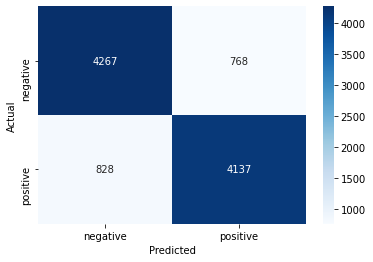

In [ ]:
#Plotting Confusion Matrix
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, mnb.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="Blues", annot=True, fmt='g')
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
# Evaluating the model
from sklearn.metrics import accuracy_score

accuracy_score_bnb = accuracy_score(bnb.predict(X_test), y_test)
print("BNB Accuracy: "+str('{:04.2f}'.format(accuracy_score_bnb*100))+" %")

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report: \n", classification_report(y_test, bnb.predict(X_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, bnb.predict(X_test)))

BNB Accuracy: 84.63 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.84      0.85      0.85      5035
    Positive       0.85      0.84      0.84      4965

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix: 
 [[4295  740]
 [ 797 4168]]


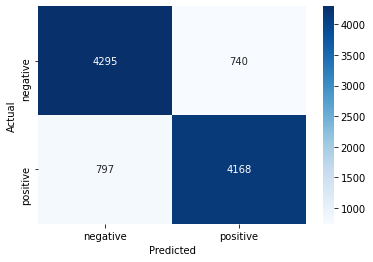

In [ ]:
#Plotting Confusion Matrix
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, bnb.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="Blues", annot=True, fmt='g')
plt.show()

In [ ]:
sarc_review1 = "'Valentine's Day' is being marketed as a Date Movie. I think it's more of a First-Date Movie. If your date likes it, do not date that person again. And if you like it, there may not be a second date."

review = re.sub('[^a-zA-Z]', ' ', sarc_review1)
review = review.lower()
review = review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
review = ' '.join(review)
print(review)

valentin day market date movi think first date movi date like not date person like may not second date


In [ ]:
X_custom = cv.transform([review]).toarray()
res = rf.predict(X_custom)
print(res)

['positive']
